In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df_customers = pd.read_csv('customers.csv')
df_loans = pd.read_csv('loans.csv')
df_bureau = pd.read_csv('bureau_data.csv')

In [4]:
df_customers.head(5) 

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [5]:
df_loans.head(5)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [6]:
df_bureau.head(5)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [7]:
df = pd.merge(df_customers,df_loans,on='cust_id') 
df.head(5) 

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [8]:
df = pd.merge(df,df_bureau,on = 'cust_id')

In [9]:
df.head(5)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [11]:
df['default'] = df['default'].astype(int)

In [12]:
df.head(5)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,0,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,0,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,0,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,0,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,0,4,2,120,0,0,5,10


In [13]:
df.default.value_counts( )

default
0    45703
1     4297
Name: count, dtype: int64

stratify=y	Ensures that the class proportions in y are maintained in both train and test sets. This is very important for imbalanced classification problems.

In [14]:
X=df.drop('default',axis='columns')
y=df['default'] 
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y , test_size = 0.25 , random_state = 42) 

In [15]:
X_train 

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,bank_balance_at_application,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,4820526,2020-10-31,2020-11-11,4,2,152,20,118,4,36
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,216697,2022-10-22,2022-10-27,3,1,160,10,62,5,5
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,1383842,2023-12-04,2023-12-29,1,1,54,12,67,4,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,626203,2020-06-18,2020-07-07,3,0,76,0,0,8,87
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,585099,2020-11-12,2020-12-07,1,2,60,0,0,1,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,C28516,70,M,Single,Self-Employed,2470000,0,Owned,20,Kolkata,...,501594,2022-05-30,2022-06-09,2,0,40,0,0,5,13
5558,C05559,39,F,Single,Salaried,2472000,0,Rented,26,Kolkata,...,587429,2020-02-12,2020-02-17,1,0,52,14,72,4,44
45236,C45237,39,M,Married,Self-Employed,1329000,4,Owned,10,Pune,...,517025,2024-01-30,2024-02-04,4,2,130,11,44,6,97
49228,C49229,33,M,Single,Salaried,1274000,2,Owned,26,Chennai,...,475147,2024-06-24,2024-07-21,2,1,88,0,0,6,25


In [16]:
df_train = pd.concat([X_train,y_train],axis='columns')
df_test = pd.concat([X_test,y_test],axis='columns') 
df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,2020-06-18,2020-07-07,3,0,76,0,0,8,87,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,2020-11-12,2020-12-07,1,2,60,0,0,1,71,0


In [17]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [18]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [19]:
df_train.residence_type.value_counts()

residence_type
Owned       21133
Mortgage     8858
Rented       7462
Name: count, dtype: int64

In [20]:
residence_mode = df_train.residence_type.mode()
residence_mode

0    Owned
Name: residence_type, dtype: object

In [21]:
residence_mode[0]

'Owned'

In [22]:
df_train['residence_type'] = df_train['residence_type'].fillna(residence_mode[0]) 

In [23]:
df_train.isna().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [24]:
df_test.isna().sum() 

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 15
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [25]:
df_test['residence_type'] = df_test['residence_type'].fillna(residence_mode[0]) 

In [26]:
df_test.isna().sum() 

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [27]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [28]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default'] 

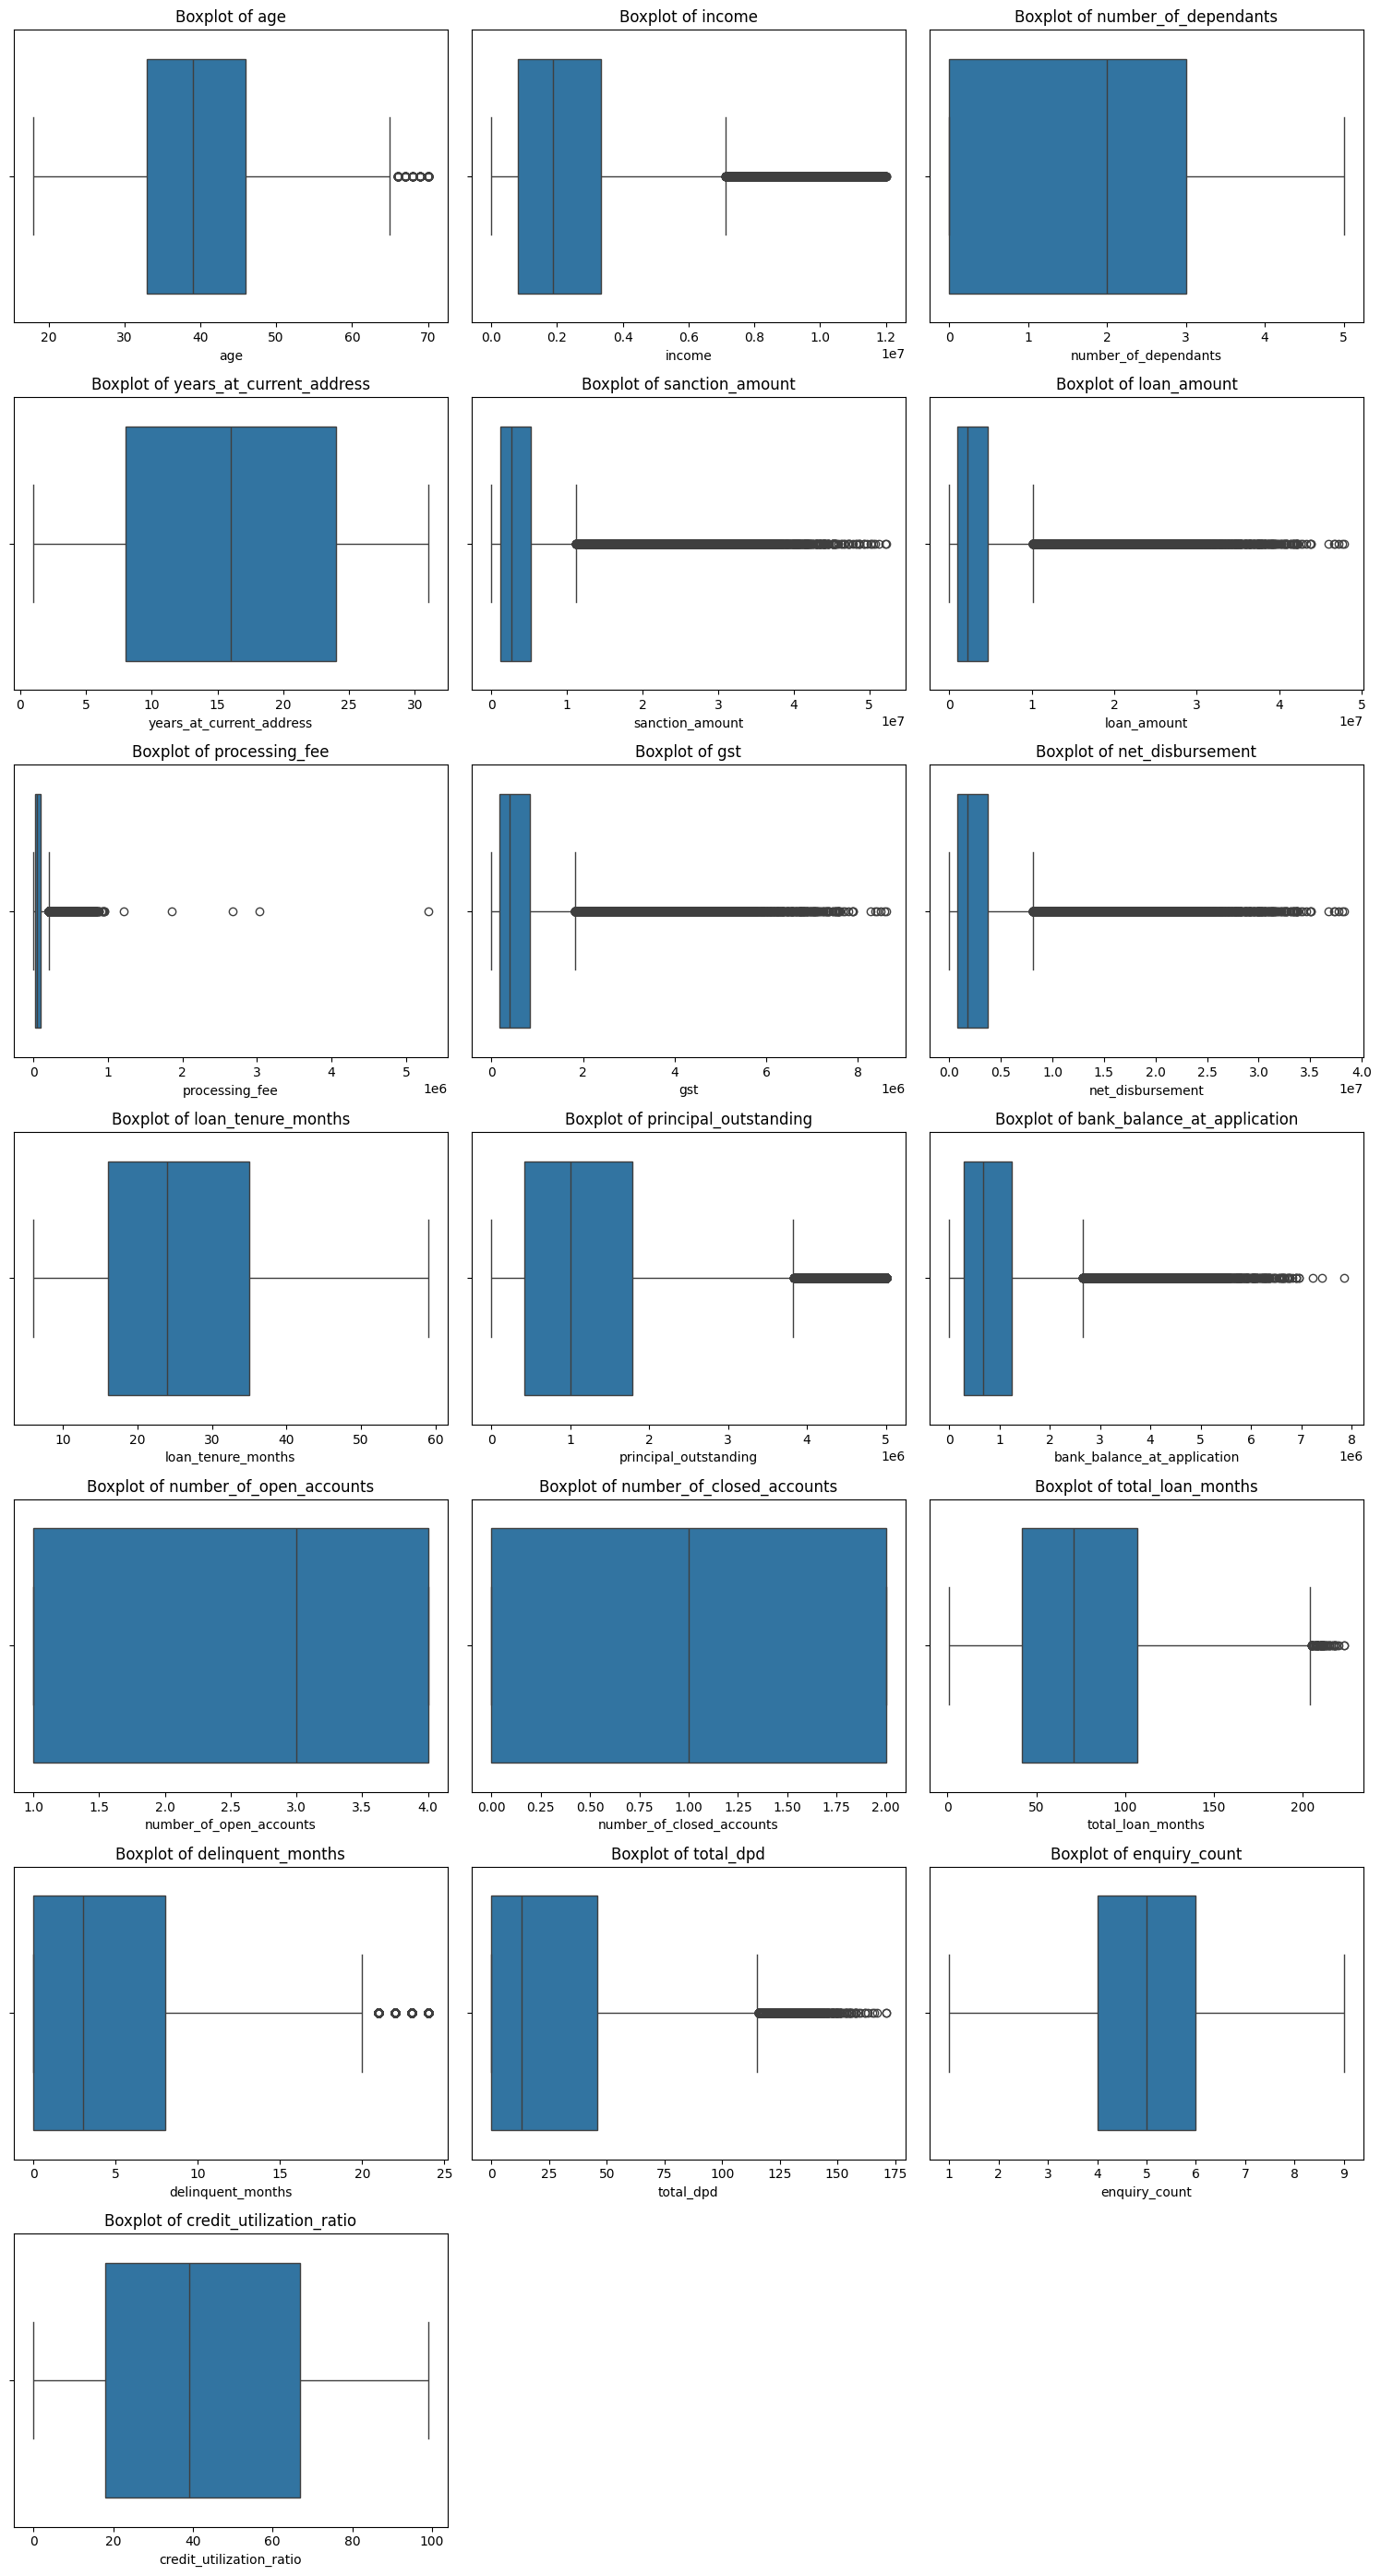

In [29]:

import math

cols = columns_continuous  # list of your continuous columns
num_cols = len(cols)
plots_per_row = 3

# Calculate number of rows needed
num_rows = math.ceil(num_cols / plots_per_row)

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 5, num_rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(cols):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove empty plots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # delete unused axes

plt.tight_layout()
plt.show()


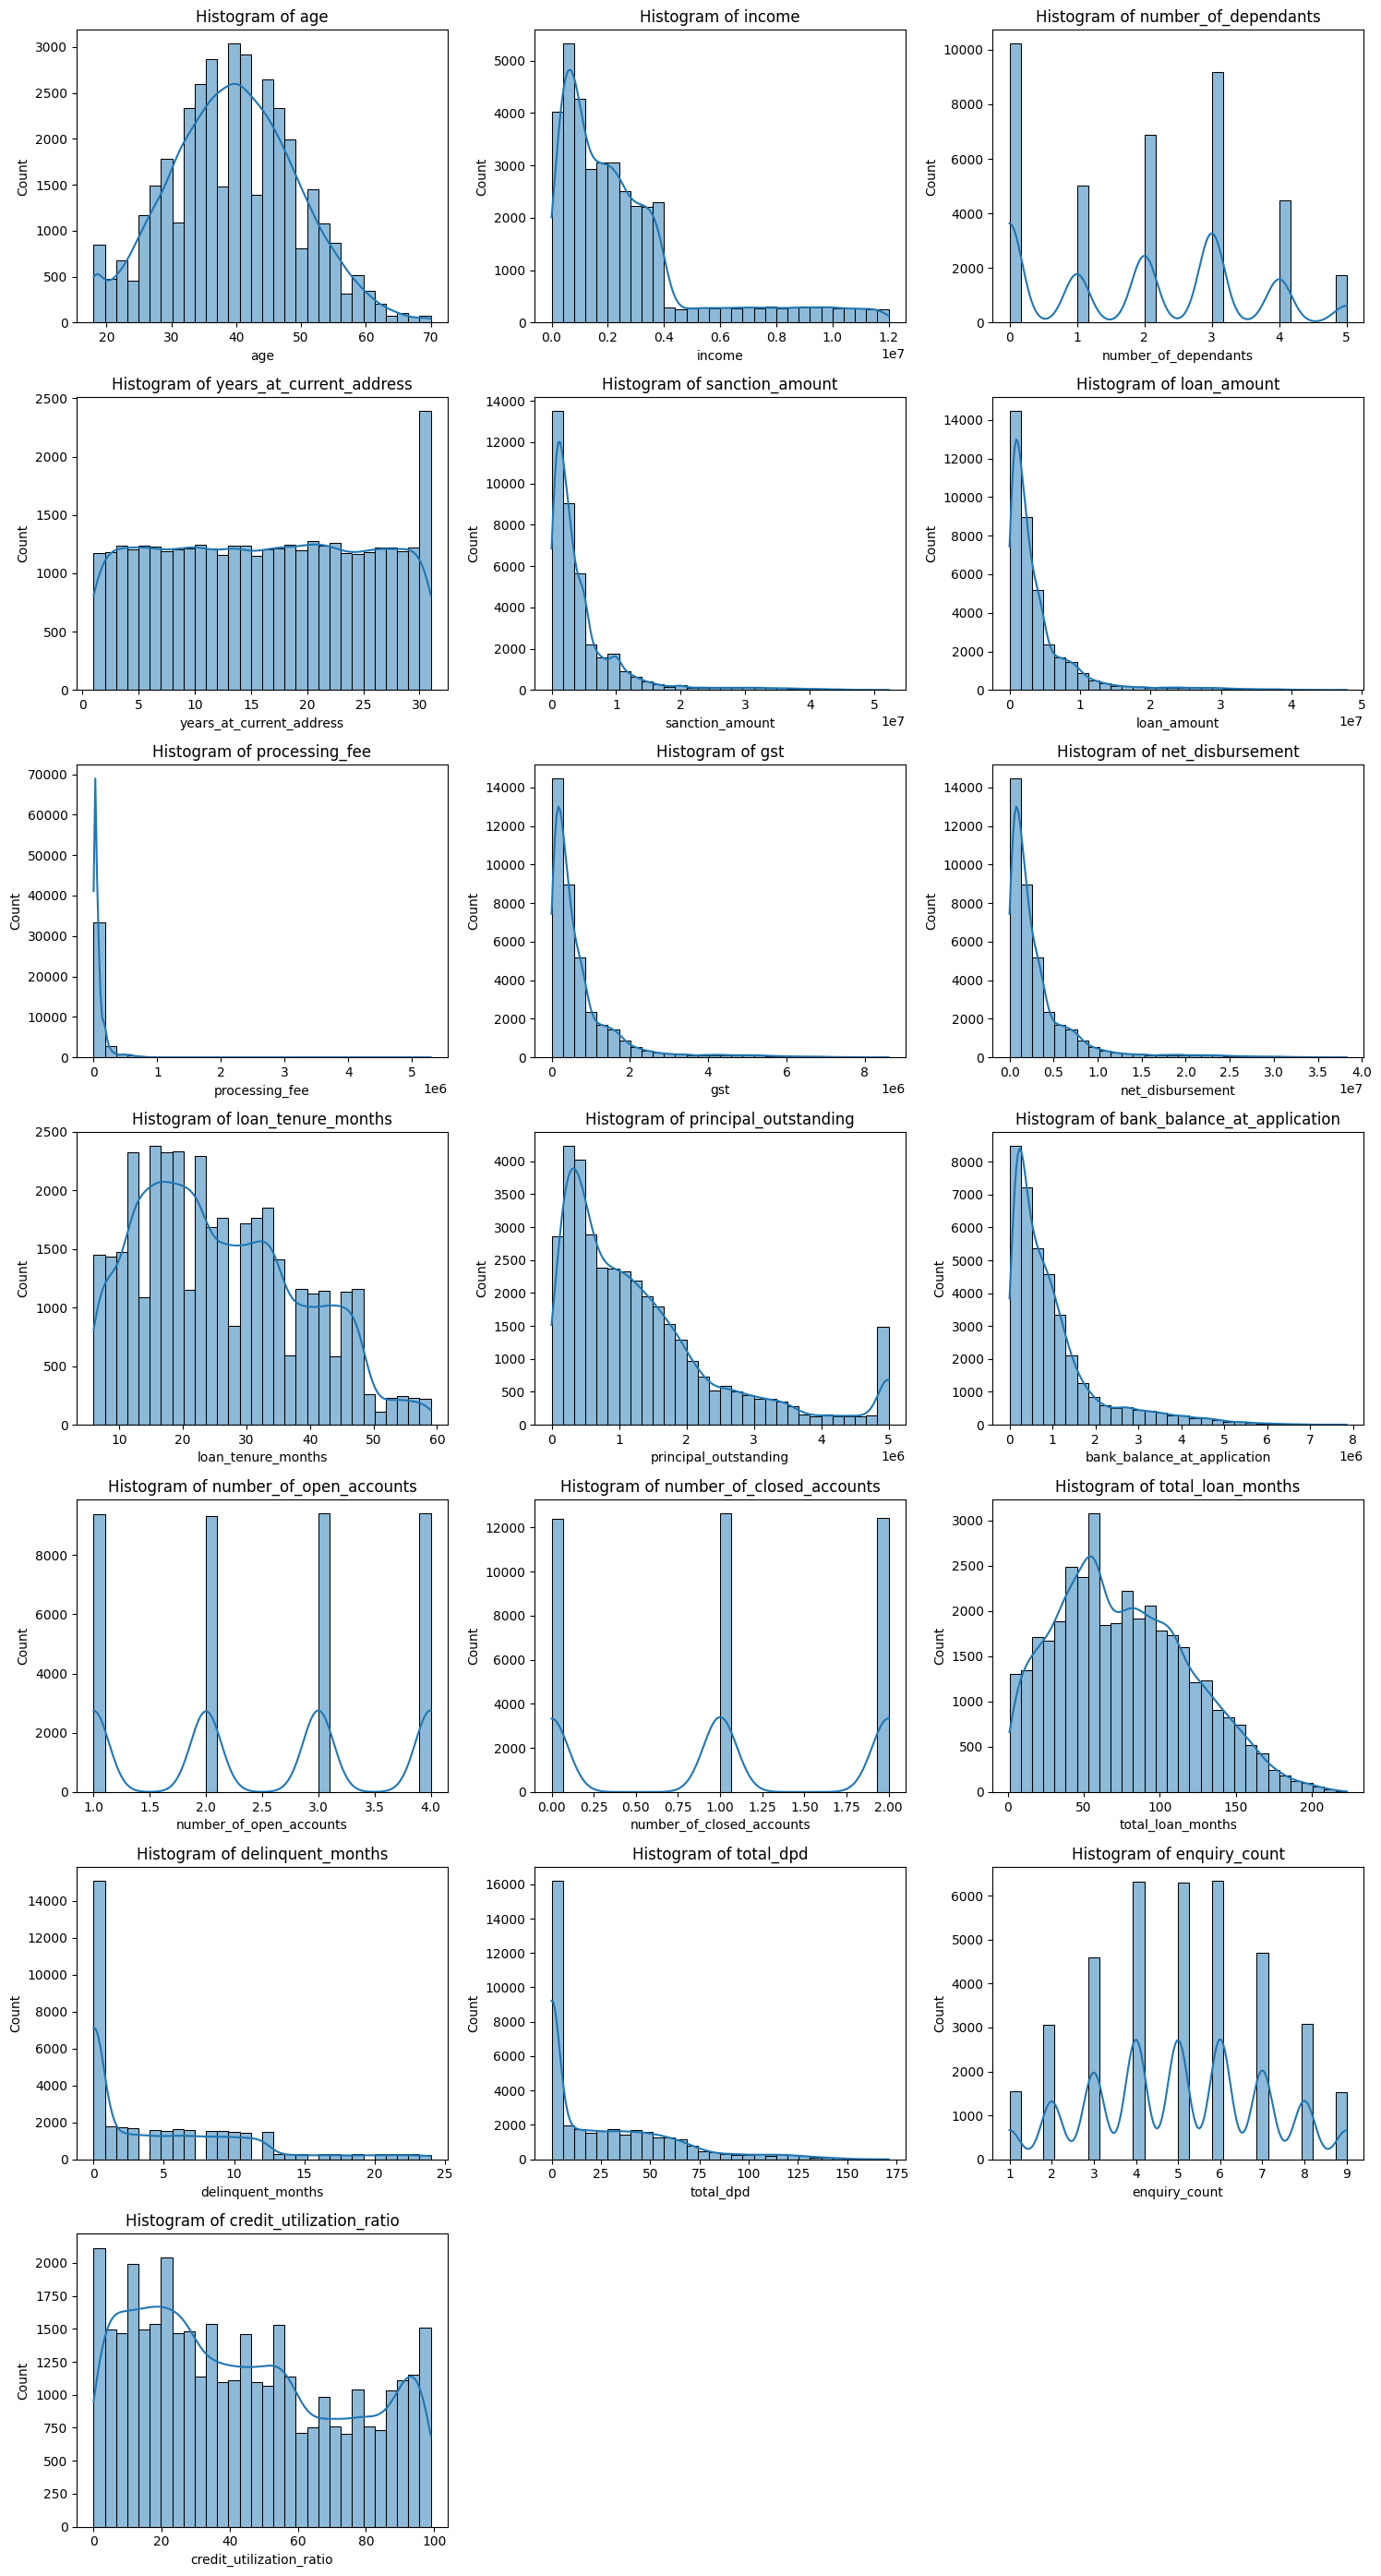

In [30]:
cols = columns_continuous  # list of your continuous columns
num_cols = len(cols)
plots_per_row = 3
# Calculate number of rows needed
num_rows = math.ceil(num_cols / plots_per_row)
# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 5, num_rows * 4))
# Flatten axes for easy iteration
axes = axes.flatten()
# Plot each histogram
for i, col in enumerate(cols):
    sns.histplot(df_train[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Histogram of {col}')
# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show() 

In [31]:
df_train.processing_fee.describe() 

count    3.750000e+04
mean     8.029068e+04
std      1.131281e+05
min      0.000000e+00
25%      1.922000e+04
50%      4.460000e+04
75%      9.242000e+04
max      5.293544e+06
Name: processing_fee, dtype: float64

In [32]:
df_train[df_train['processing_fee'] == df_train['processing_fee'].max()][['loan_amount','processing_fee']]

,loan_amount,processing_fee
9898,3626000,5.293544e+06


In [33]:
df_train[df_train['processing_fee'] > df_train['loan_amount']][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2.669791e+06
28174,966000,1.214493e+06
47089,1738000,1.858965e+06
29305,2616000,3.036378e+06
9898,3626000,5.293544e+06


Records where processing fee is greater than 3%

In [34]:
df_train[(df_train['processing_fee']/df_train['loan_amount']) > 0.03][['loan_amount','processing_fee']] 

,loan_amount,processing_fee
23981,2234000,2.669791e+06
28174,966000,1.214493e+06
47089,1738000,1.858965e+06
29305,2616000,3.036378e+06
9898,3626000,5.293544e+06


In [35]:
df_train1 = df_train[(df_train['processing_fee']/df_train['loan_amount']) < 0.03].copy() 

In [36]:
df_train1[(df_train1['processing_fee']/df_train1['loan_amount']) > 0.03][['loan_amount','processing_fee']]   

,loan_amount,processing_fee


In [37]:
df_train.shape, df_train1.shape

((37500, 33), (37488, 33))

In [38]:
df_test1 = df_test[(df_test['processing_fee']/df_test['loan_amount']) < 0.03].copy() 

In [39]:
df_test.shape, df_test1.shape 

((12500, 33), (12497, 33))

In [40]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [41]:
for col in columns_categorical:
    print(col,' =>', df_train1[col].unique())
    

gender  => ['M' 'F']
marital_status  => ['Married' 'Single']
employment_status  => ['Self-Employed' 'Salaried']
residence_type  => ['Owned' 'Mortgage' 'Rented']
city  => ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state  => ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode  => [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose  => ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type  => ['Secured' 'Unsecured']
default  => [0 1]


In [42]:
for col in columns_categorical:
    print(col,' =>', df_test1[col].unique()) 

gender  => ['M' 'F']
marital_status  => ['Married' 'Single']
employment_status  => ['Self-Employed' 'Salaried']
residence_type  => ['Owned' 'Mortgage' 'Rented']
city  => ['Jaipur' 'Delhi' 'Pune' 'Chennai' 'Ahmedabad' 'Lucknow' 'Kolkata'
 'Mumbai' 'Bangalore' 'Hyderabad']
state  => ['Rajasthan' 'Delhi' 'Maharashtra' 'Tamil Nadu' 'Gujarat' 'Uttar Pradesh'
 'West Bengal' 'Karnataka' 'Telangana']
zipcode  => [302001 110001 411001 600001 380001 226001 700001 400001 560001 500001]
loan_purpose  => ['Home' 'Education' 'Auto' 'Personal' 'Personaal']
loan_type  => ['Secured' 'Unsecured']
default  => [0 1]


In [43]:
# Fix typo in train and test sets
df_train1['loan_purpose'] = df_train1['loan_purpose'].replace('Personaal', 'Personal')
df_test1['loan_purpose'] = df_test1['loan_purpose'].replace('Personaal', 'Personal')


In [44]:
for col in columns_categorical:
    print(col,' =>', df_test1[col].unique())

gender  => ['M' 'F']
marital_status  => ['Married' 'Single']
employment_status  => ['Self-Employed' 'Salaried']
residence_type  => ['Owned' 'Mortgage' 'Rented']
city  => ['Jaipur' 'Delhi' 'Pune' 'Chennai' 'Ahmedabad' 'Lucknow' 'Kolkata'
 'Mumbai' 'Bangalore' 'Hyderabad']
state  => ['Rajasthan' 'Delhi' 'Maharashtra' 'Tamil Nadu' 'Gujarat' 'Uttar Pradesh'
 'West Bengal' 'Karnataka' 'Telangana']
zipcode  => [302001 110001 411001 600001 380001 226001 700001 400001 560001 500001]
loan_purpose  => ['Home' 'Education' 'Auto' 'Personal']
loan_type  => ['Secured' 'Unsecured']
default  => [0 1]


In [45]:
df_train1[(df_train1['gst']/df_train['loan_amount']) > 0.2]

C:\Users\Vikram Yadav\AppData\Local\Temp\ipykernel_14496\2425503677.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train1[(df_train1['gst']/df_train['loan_amount']) > 0.2]


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


<h3 style="color:blue" align="center">Exploratory Data Analysis</h3>

In [46]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

### Age Column

<Axes: xlabel='age', ylabel='Density'>

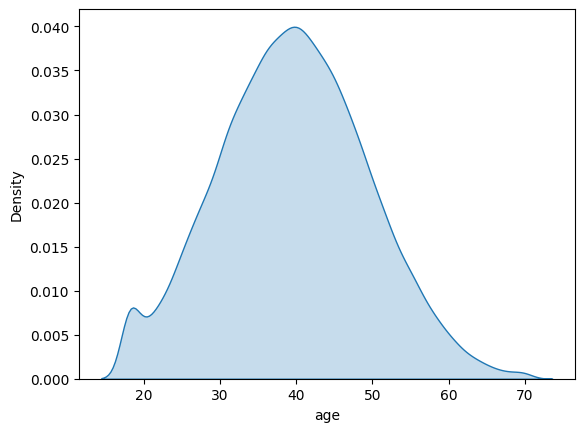

In [47]:
sns.kdeplot(df_train1['age'],fill = True)

<Axes: xlabel='age', ylabel='Count'>

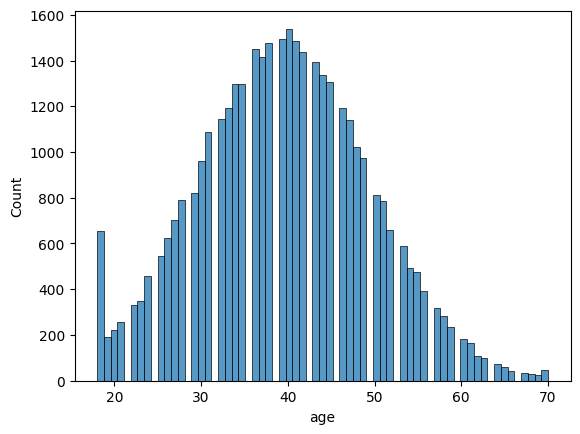

In [48]:
sns.histplot(df_train1['age'],fill = True)

In [49]:
df_train1.groupby('default')['age'].describe() 

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,34265.0,39.767693,9.880235,18.0,33.0,40.0,46.0,70.0
1,3223.0,37.124729,9.290168,18.0,31.0,37.0,44.0,70.0


### Insights
1. Average age in the default group is (37) a little less than those who paid the loans on time.
2. min and max ages for both groups is almost similar
3. variance for both group is almost equal

<Axes: xlabel='age', ylabel='Density'>

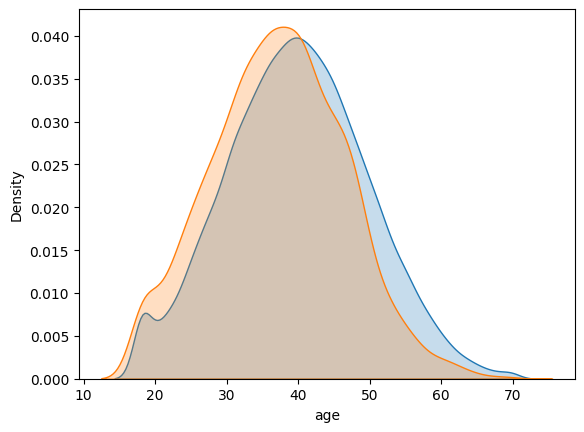

In [50]:
sns.kdeplot(df_train1['age'][df_train1['default'] == 0], fill = True)
sns.kdeplot(df_train1['age'][df_train1['default'] == 1], fill = True)

### Insights
From data we can clearly see that most of the records with younger age are most likely to default. the orange curve slightly shifted towards left.

### KDE for all the Columns

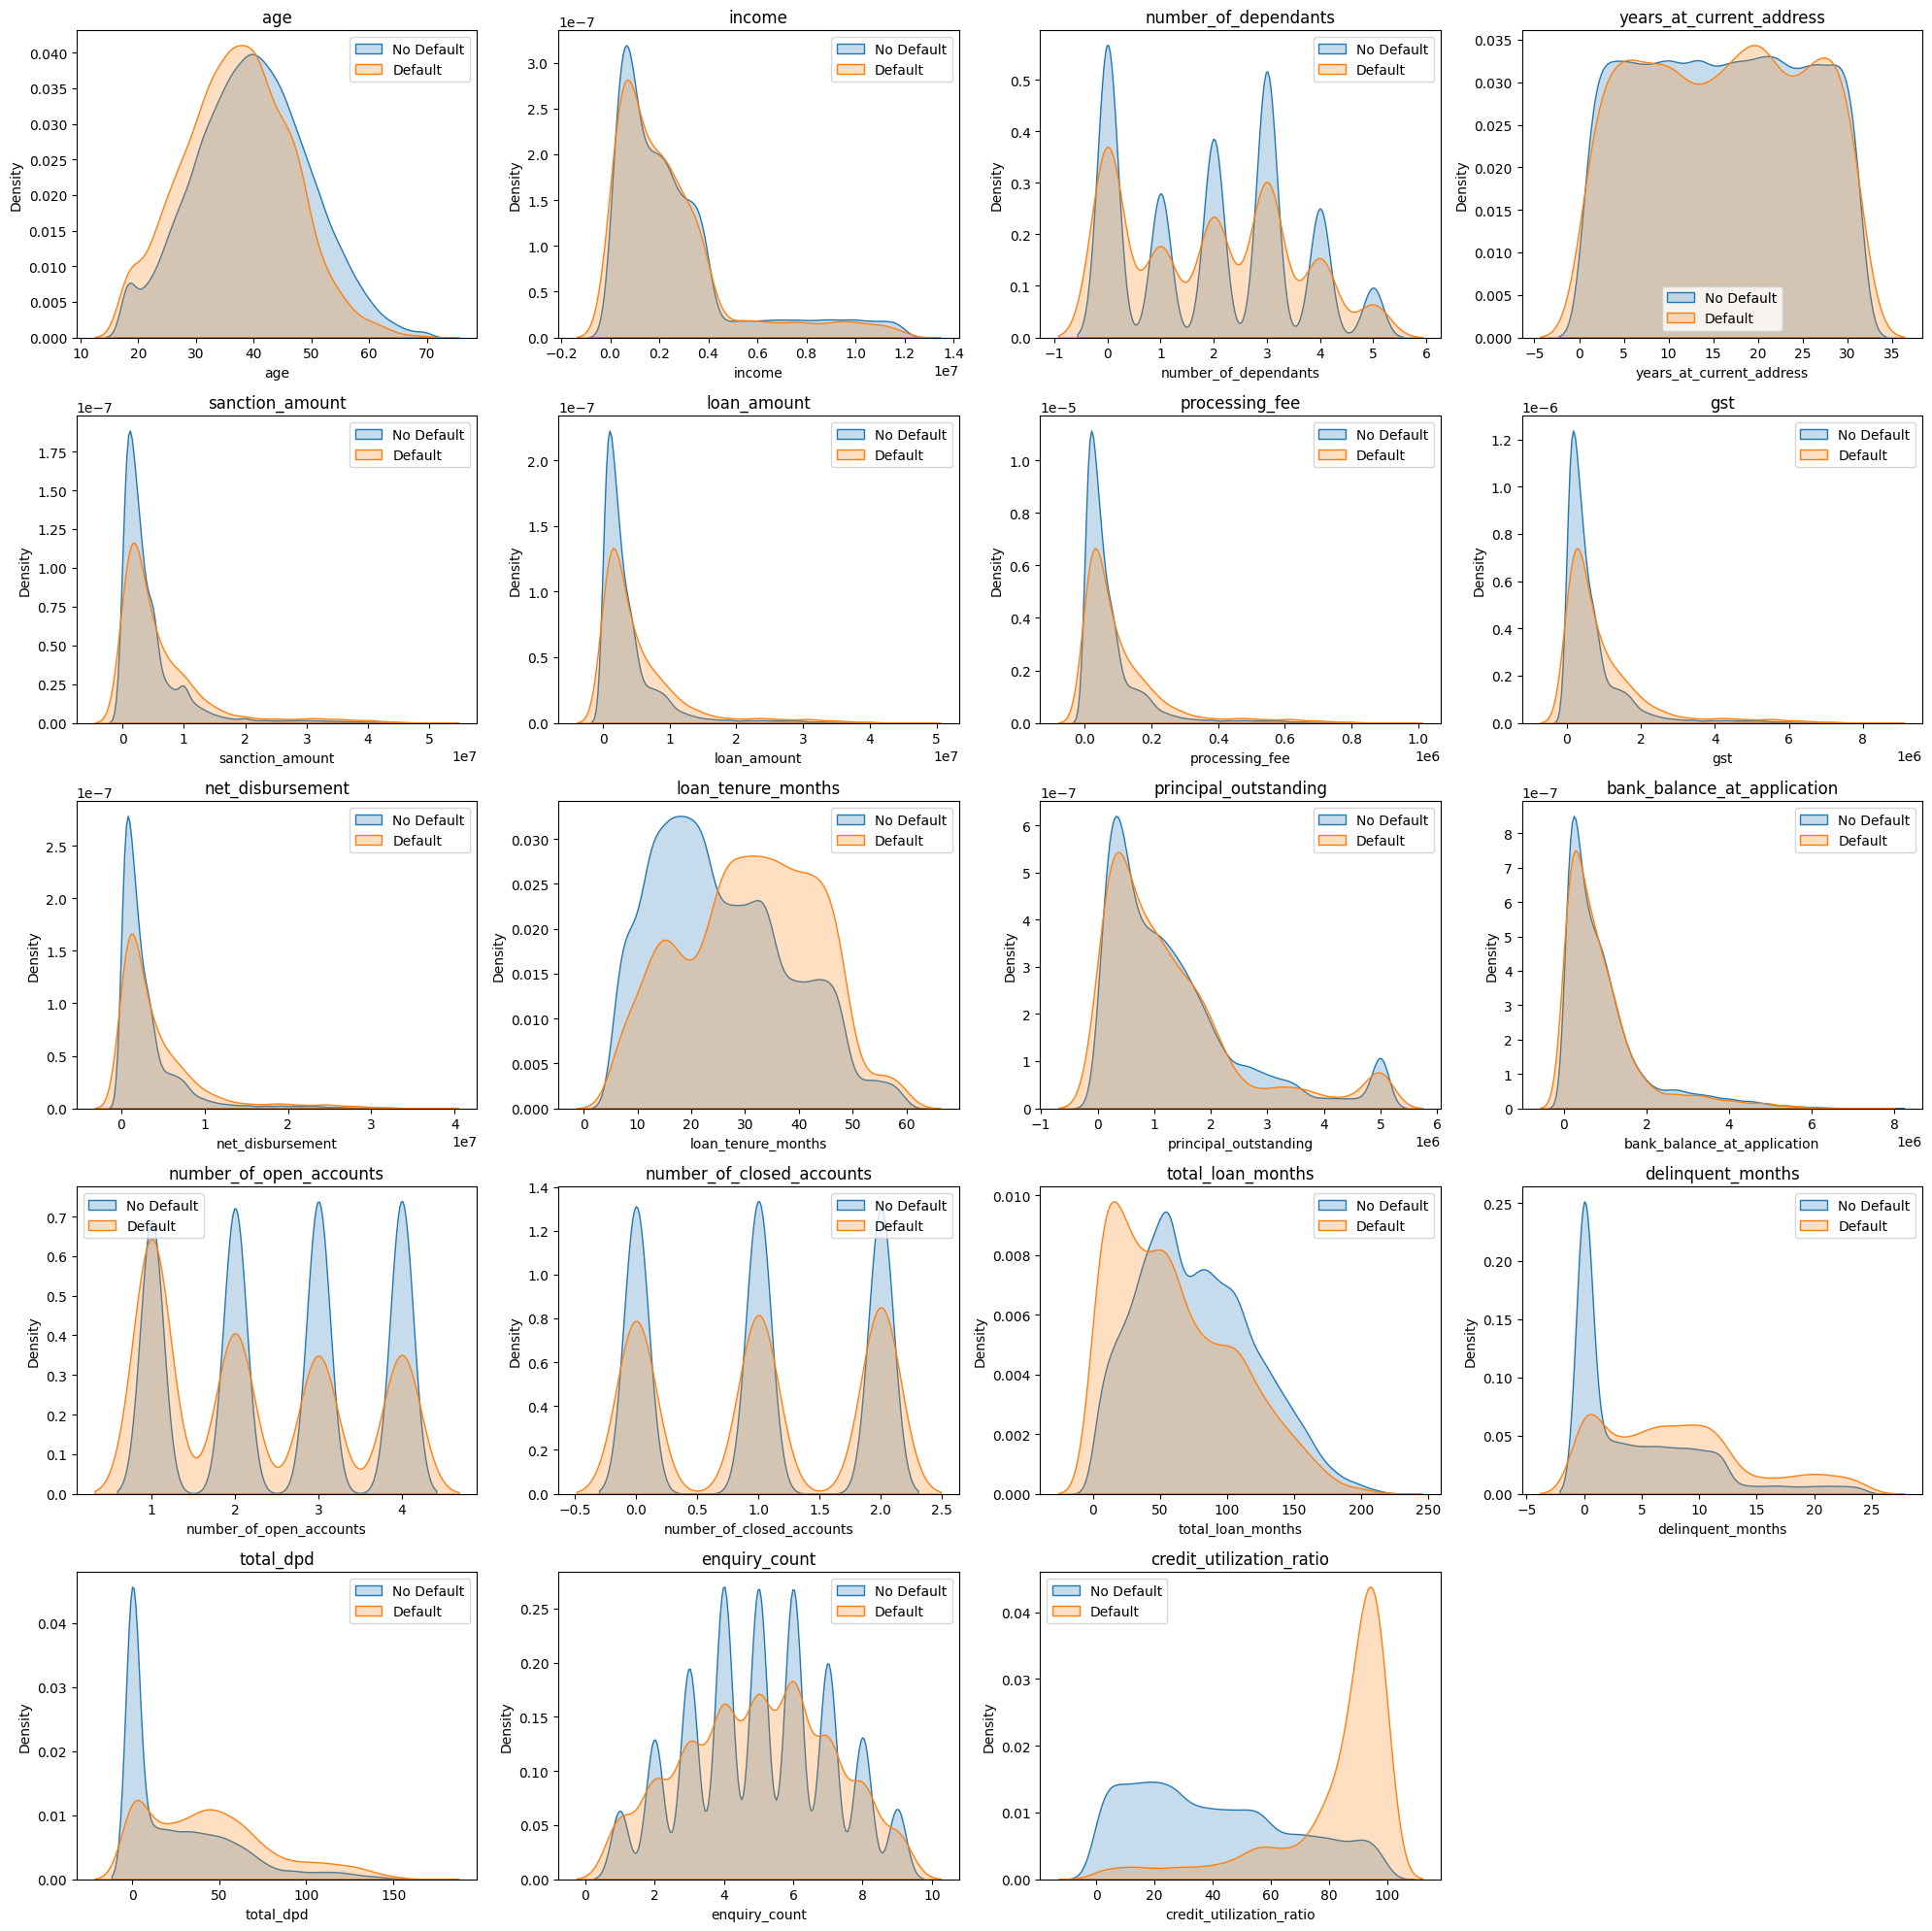

In [51]:
ncols = 4
nrows = math.ceil(len(columns_continuous) / ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()  # to simplify indexing

for i, col in enumerate(columns_continuous):
    ax = axes[i]
    sns.kdeplot(df_train1[col][df_train1['default'] == 0], fill=True, label='No Default', ax=ax)
    sns.kdeplot(df_train1[col][df_train1['default'] == 1], fill=True, label='Default', ax=ax)
    ax.set_title(f'{col}')
    ax.legend()

# Hide any unused axes if columns < total subplots
for j in range(len(columns_continuous), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Insights
1. Records with greater loan_tenure_months are likely to default.
2. Records with greater credit utilization ratio are likely to default
3.  In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
4.  In remaining columns the distributions do not give any obvious insight
5.  Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. 

<h3 style="color:blue" align="center">Feature Engineering, Feature Selection</h3>

#### Generate Loan to Income (LTI) Ratio

In [52]:
df_train1['loan_to_income_ratio'] = df_train1['loan_amount']/df_train1['income'] 

In [53]:
df_test1['loan_to_income_ratio'] = df_test1['loan_amount']/df_test1['income'] 

In [54]:
df_train1[['loan_to_income_ratio']].head(2)  

,loan_to_income_ratio
12746,2.069568
32495,1.606993


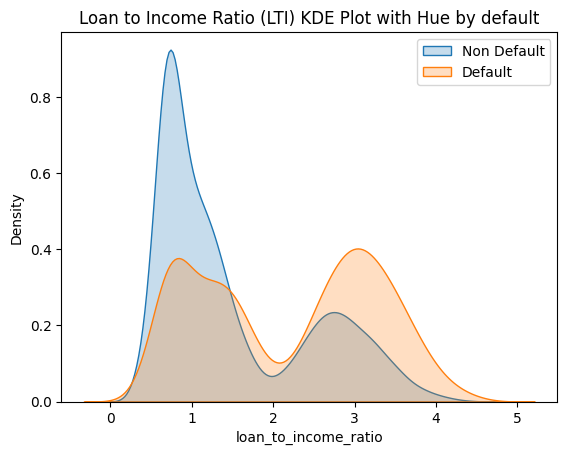

In [55]:
sns.kdeplot(df_train1['loan_to_income_ratio'][df_train1['default'] == 0], fill = True,label = 'Non Default')
sns.kdeplot(df_train1['loan_to_income_ratio'][df_train1['default'] == 1], fill = True, label = 'Default')
plt.title(f"Loan to Income Ratio (LTI) KDE Plot with Hue by default")
plt.legend()
plt.show() 

**Insights**
1. Blue graph has majority of its values on lower side of LTI
2. Orange graph has many values when LTI is higher indicating that higher LTI means high risk loan

#### Generate Delinquency Ratio

In [56]:
df_train1['delinquent_to_total_loan_ratio'] = df_train1['delinquent_months'] * 100 /df_train1['total_loan_months']
df_test1['delinquent_to_total_loan_ratio'] = df_test1['delinquent_months'] * 100 /df_test1['total_loan_months']

In [57]:
df_train1[['delinquent_to_total_loan_ratio']].head(4)

,delinquent_to_total_loan_ratio
12746,13.157895
32495,6.250000
43675,22.222222
9040,0.000000


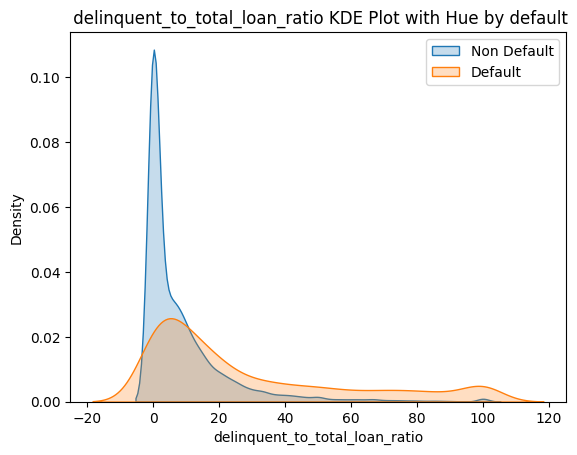

In [58]:
sns.kdeplot(df_train1['delinquent_to_total_loan_ratio'][df_train1['default'] == 0], fill = True,label = 'Non Default')
sns.kdeplot(df_train1['delinquent_to_total_loan_ratio'][df_train1['default'] == 1], fill = True,label = 'Default')
plt.title(f" delinquent_to_total_loan_ratio KDE Plot with Hue by default")
plt.legend()
plt.show() 

**Insights**
1. Blue graph has majority of its values on lower side of LTI
2. Orange graph has many values when delinquency ratio is higher indicating some correlation on default

#### Generate Avg DPD Per Delinquency

In [59]:
df_train1['avg_dpd'] = np.where(
    df_train1['delinquent_months'] != 0,
    df_train1['total_dpd'] / df_train1['delinquent_months'],
    0.0
)

df_test1['avg_dpd'] = np.where(
    df_test1['delinquent_months'] != 0,
    df_test1['total_dpd'] / df_test1['delinquent_months'],
    0.0
)

In [60]:
df_train1[['avg_dpd']].head(2)

,avg_dpd
12746,5.9
32495,6.2


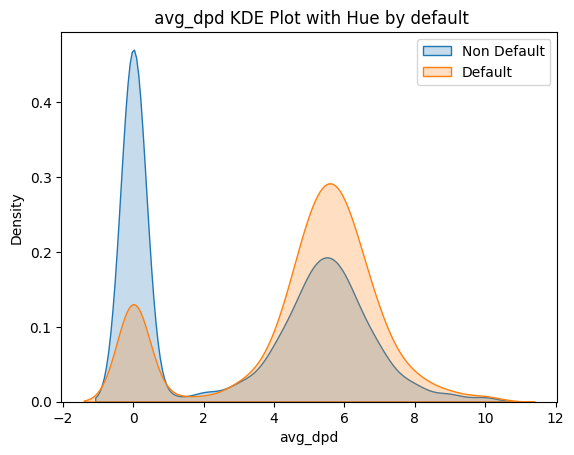

In [61]:
sns.kdeplot(df_train1['avg_dpd'][df_train1['default'] == 0], fill = True,label = 'Non Default')
sns.kdeplot(df_train1['avg_dpd'][df_train1['default'] == 1], fill = True,label = 'Default')
plt.title(f" avg_dpd KDE Plot with Hue by default")
plt.legend()
plt.show() 

**Insights**

1. Graph clearly shows more occurances of default cases when avg_dpd_per_delinquency is high. This means this column is a strong predictor

df_train1.columns

In [62]:
df_train1.shape , df_test1.shape

((37488, 36), (12497, 36))

### Remove columns that are just unique ids and don't have influence on target

In [63]:
df_train2 = df_train1.drop(['cust_id', 'loan_id'],axis="columns") 
df_test2 = df_test1.drop(['cust_id', 'loan_id'],axis="columns")  

### Remove columns that business contact person asked us to remove

In [64]:
df_train3 = df_train2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test3 = df_test2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train3.columns 

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income_ratio',
       'delinquent_to_total_loan_ratio', 'avg_dpd'],
      dtype='object')

In [65]:
df_train3.shape, df_test3.shape

((37488, 27), (12497, 27))

In [66]:
df_train3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             37488 non-null  int64  
 1   gender                          37488 non-null  object 
 2   marital_status                  37488 non-null  object 
 3   employment_status               37488 non-null  object 
 4   number_of_dependants            37488 non-null  int64  
 5   residence_type                  37488 non-null  object 
 6   years_at_current_address        37488 non-null  int64  
 7   city                            37488 non-null  object 
 8   state                           37488 non-null  object 
 9   zipcode                         37488 non-null  int64  
 10  loan_purpose                    37488 non-null  object 
 11  loan_type                       37488 non-null  object 
 12  sanction_amount                 3

In [67]:
df_train3.select_dtypes(['int64'],['float64']) 

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,default
12746,59,3,30,500001,33121000,4219560,18753600,28,5000000,4820526,4,2,4,36,0
32495,44,0,27,400001,1175000,206820,919200,50,467229,216697,3,1,5,5,0
43675,38,0,26,600001,11409000,2033280,9036800,32,1656773,1383842,1,1,4,0,0
9040,42,2,30,560001,2336000,305100,1356000,40,1023442,626203,3,0,8,87,0
13077,58,4,29,411001,1167000,162900,724000,15,651599,585099,1,2,1,71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,70,0,20,700001,1562000,255600,1136000,12,1022399,501594,2,0,5,13,0
5558,39,0,26,700001,3208000,495540,2202400,32,1123466,587429,1,0,4,44,0
45236,39,4,10,411001,4804000,806220,3583200,38,913243,517025,4,2,6,97,1
49228,33,2,26,600001,2451000,340200,1512000,37,635515,475147,2,1,6,25,0


In [68]:
df_train3.select_dtypes(['int64'],['float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default'],
      dtype='object')

### VIF to measure multicolinearity

In [69]:
X_train3 = df_train3.drop('default',axis = 'columns')
y_train3 = df_train3['default']
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = X_train3.select_dtypes(include=['int64', 'float64']).columns
cols_to_scale 
scaler = MinMaxScaler()
X_train3[cols_to_scale] = scaler.fit_transform(X_train3[cols_to_scale]) 

In [70]:
X_train3[cols_to_scale].describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income_ratio,delinquent_to_total_loan_ratio,avg_dpd
count,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.00000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000
mean,0.414240,0.388903,0.499918,0.523517,0.088840,0.082513,0.082513,0.082513,0.376631,0.261615,0.123550,0.500925,0.50056,0.501077,0.438653,0.294964,0.103300,0.328418
std,0.189590,0.307182,0.297364,0.286491,0.120117,0.112480,0.112480,0.112480,0.234860,0.244461,0.133275,0.373040,0.40701,0.253666,0.296902,0.228177,0.172983,0.290674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.020555,0.018963,0.018963,0.018963,0.188679,0.077988,0.034205,0.000000,0.00000,0.375000,0.181818,0.110257,0.000000,0.000000
50%,0.403846,0.400000,0.500000,0.491525,0.049364,0.045516,0.045516,0.045516,0.339623,0.193870,0.082515,0.666667,0.50000,0.500000,0.393939,0.201941,0.036787,0.433333
75%,0.538462,0.600000,0.766667,0.762712,0.098027,0.095555,0.095555,0.095555,0.547170,0.352418,0.155192,1.000000,1.00000,0.625000,0.676768,0.506913,0.129496,0.574185
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Same transformation on test set

In [71]:
X_test3 = df_test3.drop('default',axis = 'columns')
y_test3 = df_test3['default']
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = X_test3.select_dtypes(include=['int64', 'float64']).columns
cols_to_scale 
scaler = MinMaxScaler()
X_test3[cols_to_scale] = scaler.fit_transform(X_test3[cols_to_scale]) 

In [72]:
X_test3.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income_ratio,delinquent_to_total_loan_ratio,avg_dpd
count,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000
mean,0.415001,0.384892,0.502697,0.525015,0.090941,0.086037,0.086037,0.086037,0.375092,0.264512,0.132421,0.497293,0.500440,0.501470,0.436038,0.292218,0.106078,0.333860
std,0.188773,0.306871,0.298103,0.286179,0.123151,0.117111,0.117111,0.117111,0.233792,0.245330,0.143538,0.372576,0.407226,0.253618,0.295418,0.224857,0.173082,0.289687
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.021378,0.020245,0.020245,0.020245,0.188679,0.079565,0.035694,0.000000,0.000000,0.375000,0.181818,0.111506,0.000000,0.000000
50%,0.423077,0.400000,0.500000,0.510169,0.051167,0.048115,0.048115,0.048115,0.339623,0.198108,0.088820,0.333333,0.500000,0.500000,0.393939,0.201507,0.042105,0.440000
75%,0.538462,0.600000,0.766667,0.762712,0.099302,0.098618,0.098618,0.098618,0.547170,0.356809,0.167423,0.666667,1.000000,0.625000,0.676768,0.497361,0.133929,0.575000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [74]:
vif_df = calculate_vif(X_train3[cols_to_scale])

C:\Users\Vikram Yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [75]:
vif_df

,Column,VIF
0,age,5.700577
1,number_of_dependants,2.730327
2,years_at_current_address,3.422733
3,zipcode,3.797717
4,sanction_amount,101.086562
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.181066
9,principal_outstanding,16.326129


In [76]:
features_to_drop = ['processing_fee','gst','net_disbursement','sanction_amount','principal_outstanding'] 

In [77]:
X_train4 = X_train3.drop(features_to_drop,axis = 'columns')
numeric_columns4 = X_train4.select_dtypes(include = ['int64','float64']).columns

In [78]:
X_test4 = X_test3.drop(['processing_fee','gst','net_disbursement','sanction_amount','principal_outstanding'],axis = 'columns') 

In [79]:
numeric_columns4 

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income_ratio',
       'delinquent_to_total_loan_ratio', 'avg_dpd'],
      dtype='object')

In [80]:
vif_df = calculate_vif(X_train4[numeric_columns4])

In [81]:
vif_df 

,Column,VIF
0,age,5.428846
1,number_of_dependants,2.726782
2,years_at_current_address,3.403800
3,zipcode,3.777997
4,loan_tenure_months,6.019274
5,bank_balance_at_application,1.804690
6,number_of_open_accounts,4.353491
7,number_of_closed_accounts,2.372476
8,enquiry_count,6.384190
9,credit_utilization_ratio,2.919877


In [82]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio',
       'loan_to_income_ratio', 'delinquent_to_total_loan_ratio',
       'avg_dpd'], dtype=object)

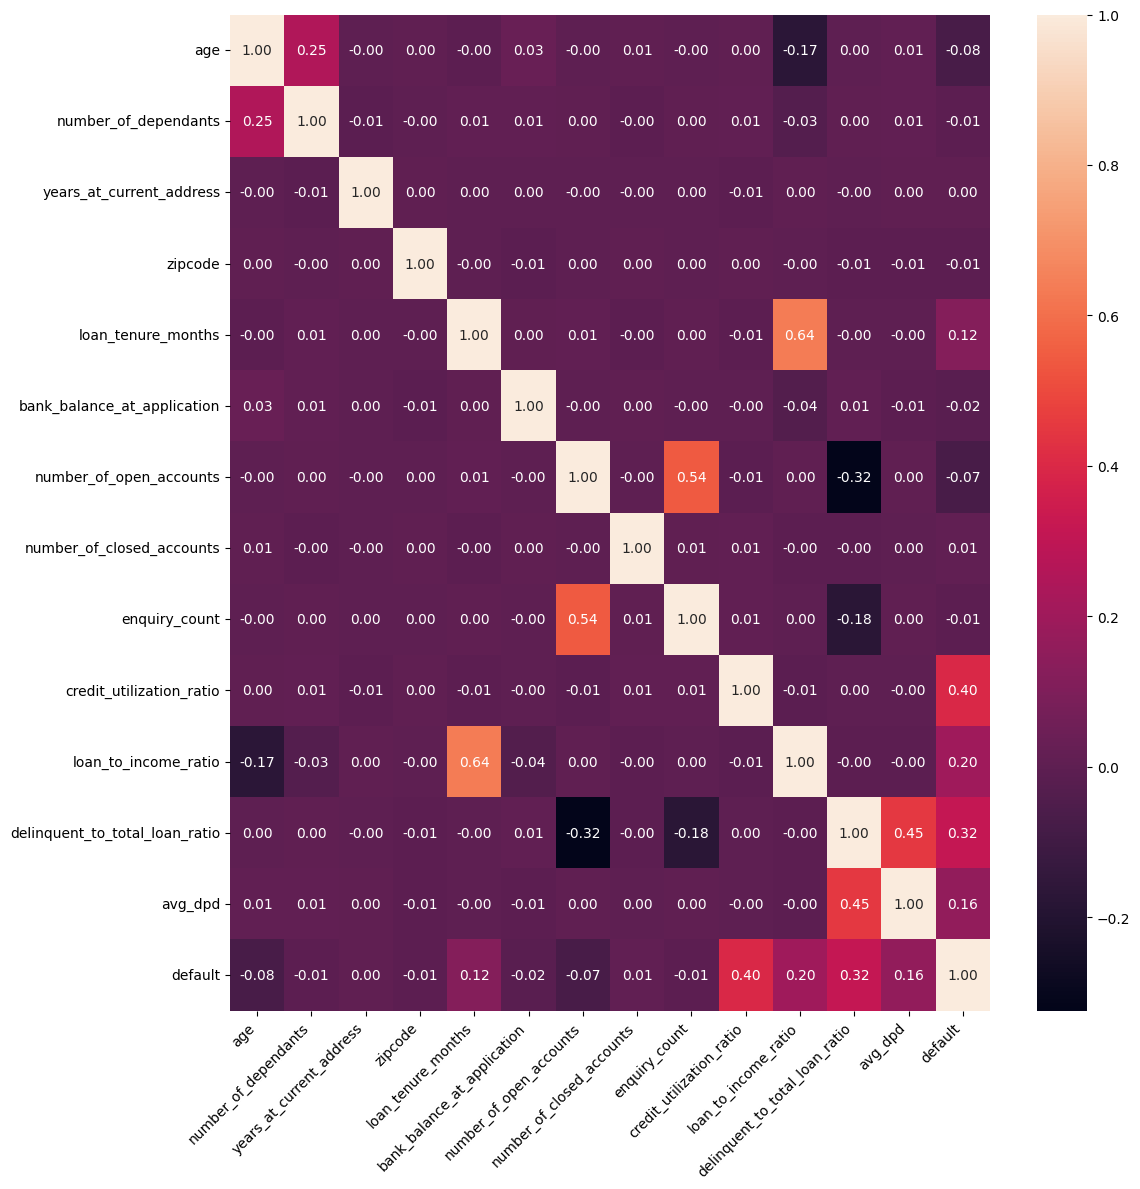

In [83]:
plt.figure(figsize=(12,12))
cm = df_train3[numeric_columns4.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show() 

In [84]:
X_train4.shape,X_test4.shape

((37488, 21), (12497, 21))

### Feature Selection: Categorical Features

In [85]:
df_train3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income_ratio',
       'delinquent_to_total_loan_ratio', 'avg_dpd'],
      dtype='object')

In [86]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

### Calculate WOE and IV

In [87]:
def calculate_woe_iv(df,feature,target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns = {'count' : 'Total','sum' : 'good'})
    grouped['bad'] = grouped['Total'] - grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good']/total_good
    grouped['bad_pct'] = grouped['bad']/total_bad
    
    grouped['woe'] = np.log(grouped['good_pct']/grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct']-grouped['bad_pct']) *  grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)

    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv
    

In [88]:
grouped, total_iv = calculate_woe_iv(pd.concat([X_train4,y_train3],axis=1),'loan_purpose','default') 
grouped

,Total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.101458,0.207792,-0.716891,0.076230
Education,5620,559,5061,0.173441,0.147702,0.160642,0.004135
Home,11304,1734,9570,0.538008,0.279294,0.655609,0.169616
Personal,13117,603,12514,0.187093,0.365212,-0.668874,0.119140


In [89]:
total_iv

np.float64(0.3691197842282755)

In [90]:
X_train3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             37488 non-null  float64
 1   gender                          37488 non-null  object 
 2   marital_status                  37488 non-null  object 
 3   employment_status               37488 non-null  object 
 4   number_of_dependants            37488 non-null  float64
 5   residence_type                  37488 non-null  object 
 6   years_at_current_address        37488 non-null  float64
 7   city                            37488 non-null  object 
 8   state                           37488 non-null  object 
 9   zipcode                         37488 non-null  float64
 10  loan_purpose                    37488 non-null  object 
 11  loan_type                       37488 non-null  object 
 12  sanction_amount                 3

In [91]:
iv_values = {}
for feature in X_train4.columns:
    if X_train4[feature].dtype == 'object':
        _ , iv = calculate_woe_iv(pd.concat([X_train4,y_train3],axis=1),feature,'default')
    else:
        X_binned = pd.cut(X_train4[feature],bins = 10,labels = False)
        _ , iv = calculate_woe_iv(pd.concat([X_binned,y_train3],axis=1),feature,'default')
    iv_values[feature] = iv
iv_values    
    
    

{'age': np.float64(0.0890689462679479),
 'gender': np.float64(0.00047449502170914947),
 'marital_status': np.float64(0.001129766845390142),
 'employment_status': np.float64(0.003953046301722585),
 'number_of_dependants': np.float64(0.0019380899135053508),
 'residence_type': np.float64(0.246745268718145),
 'years_at_current_address': np.float64(0.0020800513608156363),
 'city': np.float64(0.0019059578709781529),
 'state': np.float64(0.0019005589806779287),
 'zipcode': np.float64(0.0016677413243392572),
 'loan_purpose': np.float64(0.3691197842282755),
 'loan_type': np.float64(0.16319324904149224),
 'loan_tenure_months': np.float64(0.21893515090196278),
 'bank_balance_at_application': np.float64(0.0063187993277516365),
 'number_of_open_accounts': np.float64(0.08463134083005877),
 'number_of_closed_accounts': np.float64(0.0011964272592421567),
 'enquiry_count': np.float64(0.007864214085342608),
 'credit_utilization_ratio': np.float64(2.352965568168245),
 'loan_to_income_ratio': np.float64(0

In [92]:
type(iv_values)

dict

In [93]:
X_train4.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income_ratio',
       'delinquent_to_total_loan_ratio', 'avg_dpd'],
      dtype='object')

In [94]:
X_train4.shape , y_train3.shape

((37488, 21), (37488,))

In [95]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.353
19,delinquent_to_total_loan_ratio,0.717
18,loan_to_income_ratio,0.476
20,avg_dpd,0.402
10,loan_purpose,0.369
5,residence_type,0.247
12,loan_tenure_months,0.219
11,loan_type,0.163
0,age,0.089
14,number_of_open_accounts,0.085


Syntax for List Comprehension [expression for item in iterable if condition]
squares = [x**2 for x in range(5)]


### Feature Encoding

In [96]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income_ratio',
 'delinquent_to_total_loan_ratio',
 'avg_dpd']

In [97]:
X_train_reduced = X_train4[selected_features_iv]
X_test_reduced = X_test4[selected_features_iv] 

In [98]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded.head(3) 

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income_ratio,delinquent_to_total_loan_ratio,avg_dpd,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.415,1.000,0.364,0.415,0.132,0.590,True,False,False,True,False,False
32495,0.500,0.830,0.667,0.051,0.307,0.062,0.620,True,False,True,False,False,False
43675,0.385,0.491,0.000,0.000,0.759,0.222,0.558,False,False,False,True,False,False


The numeric columns remain untouched.

In [99]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded.head(3) 

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income_ratio,delinquent_to_total_loan_ratio,avg_dpd,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.549,0.000,0.000,True,False,False,True,False,False
15514,0.481,0.226,1.000,0.323,0.219,0.000,0.000,True,False,True,False,False,False
30367,0.231,0.547,0.667,0.828,0.179,0.000,0.000,True,False,False,False,False,False


In [100]:
X_train_encoded.shape,y_train3.shape

((37488, 13), (37488,))

In [101]:
X_test_encoded.shape,y_test3.shape

((12497, 13), (12497,))

<h3 align="center" style="color:blue">Model Training</h3>

### Attempt 1

1. Logistic Regression, RandomForest & XGB
1. No handling of class imbalance

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(X_train_encoded,y_train3)
y_pred = model.predict(X_test_encoded)
report = classification_report(y_test3,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.71      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [103]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_encoded,y_train3)
y_pred = model.predict(X_test_encoded)
report = classification_report(y_test3,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.86      0.72      0.78      1074

    accuracy                           0.97     12497
   macro avg       0.92      0.85      0.88     12497
weighted avg       0.96      0.97      0.96     12497



In [104]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_encoded,y_train3)
y_pred = model.predict(X_test_encoded)
report = classification_report(y_test3,y_pred)
print(report) 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.82      0.74      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



Since there is not much difference between XGB and Logistic, we will choose LogisticRegression as a candidate for our RandomizedSearchCV candidate it has a better interpretation.

#### RandomizedSearch CV for Attempt 1: Logistic Regression

In [105]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train3)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test3, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'lbfgs', 'C': np.float64(545.5594781168514)}
Best Score: 0.7571424666678884
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.84      0.73      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



#### RandomizedSearch CV for Attempt 1: XGBoost

In [106]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train3)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test3, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7881930485302191
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.77      0.83      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.88      0.90      0.89     12497
weighted avg       0.97      0.96      0.96     12497



### Attempt 2

1. Logistic Regression & XGB
1. Handle Class Imbalance Using Under Sampling

In [107]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42) 
X_train_res , y_train_res = rus.fit_resample(X_train_encoded,y_train3)
y_train_res.value_counts() 

default
0    3223
1    3223
Name: count, dtype: int64

In [108]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
y_pred = model.predict(X_test_encoded) 
report = classification_report(y_test3,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.95      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [109]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test3, y_pred)
print(report) 

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.98      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.76      0.95      0.81     12497
weighted avg       0.96      0.92      0.93     12497



### Attempt 3

1. Logistic Regression
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [110]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_train_smt,y_train_smt = smt.fit_resample(X_train_encoded,y_train3)
y_train_smt.value_counts()

default
0    34197
1    34197
Name: count, dtype: int64

In [111]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test3, y_pred)
print(report) 

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [112]:
import optuna
from sklearn.metrics import make_scorer,f1_score
from sklearn.model_selection import cross_val_score

In [113]:
def objective(trial):
    # Create the model with suggested hyperparameters
    param = {
        'C' : trial.suggest_float('C',1e-4,1e4,log=True),
        'solver' : trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),
        'tol' : trial.suggest_float('tol',1e-6,1e-4,log=True),
        'class_weight' : trial.suggest_categorical('class_weight',[None,'balanced'])
    }
    model = LogisticRegression(**param, max_iter=10000)
    f1_scorer = make_scorer(f1_score,average='macro')
    scores = cross_val_score(model,X_train_smt,y_train_smt,cv=3,scoring=f1_scorer,n_jobs=-1)
    return np.mean(scores)
study_logistics = optuna.create_study(direction = "maximize")
study_logistics.optimize(objective, n_trials = 10)
print("Best Parameters : ", study_logistics.best_params)
print("Best cross validation accuracy : ", study_logistics.best_value)


[I 2025-08-02 16:00:04,615] A new study created in memory with name: no-name-9bb298e0-fd85-4f3e-addc-8922e98dc82a
[I 2025-08-02 16:00:05,163] Trial 0 finished with value: 0.8807297060146227 and parameters: {'C': 0.0004931101636403898, 'solver': 'saga', 'tol': 2.6805484317229803e-05, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8807297060146227.
[I 2025-08-02 16:00:05,637] Trial 1 finished with value: 0.91959088134008 and parameters: {'C': 0.0031920635513920737, 'solver': 'saga', 'tol': 3.556579012724678e-06, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.91959088134008.
[I 2025-08-02 16:00:05,923] Trial 2 finished with value: 0.9126326580760081 and parameters: {'C': 0.0016798644289887322, 'solver': 'newton-cg', 'tol': 1.2004175950890062e-05, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.91959088134008.
[I 2025-08-02 16:00:06,414] Trial 3 finished with value: 0.9458111841068884 and parameters: {'C': 1.64362335424635, 'solver': 'newton-cg', 'tol': 1

Best Parameters :  {'C': 1.64362335424635, 'solver': 'newton-cg', 'tol': 1.5152631496958282e-06, 'class_weight': 'balanced'}
Best cross validation accuracy :  0.9458111841068884


In [114]:
print('best trial : ',study_logistics.best_trial)
trial = study_logistics.best_trial

best trial :  FrozenTrial(number=3, state=TrialState.COMPLETE, values=[0.9458111841068884], datetime_start=datetime.datetime(2025, 8, 2, 16, 0, 5, 923101), datetime_complete=datetime.datetime(2025, 8, 2, 16, 0, 6, 414544), params={'C': 1.64362335424635, 'solver': 'newton-cg', 'tol': 1.5152631496958282e-06, 'class_weight': 'balanced'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'C': FloatDistribution(high=10000.0, log=True, low=0.0001, step=None), 'solver': CategoricalDistribution(choices=('lbfgs', 'liblinear', 'saga', 'newton-cg')), 'tol': FloatDistribution(high=0.0001, log=True, low=1e-06, step=None), 'class_weight': CategoricalDistribution(choices=(None, 'balanced'))}, trial_id=3, value=None)


In [115]:
trial.params

{'C': 1.64362335424635,
 'solver': 'newton-cg',
 'tol': 1.5152631496958282e-06,
 'class_weight': 'balanced'}

In [116]:
print('F1 - score : {}'.format(trial.value)) 

F1 - score : 0.9458111841068884


In [117]:
for key, value in trial.params.items():
    print('{} : {}'.format(key, value))


C : 1.64362335424635
solver : newton-cg
tol : 1.5152631496958282e-06
class_weight : balanced


In [118]:
best_model = LogisticRegression(**study_logistics.best_params)
best_model.fit(X_train_smt,y_train_smt)
y_pred = best_model.predict(X_test_encoded)
report = classification_report(y_test3,y_pred)
print(report) 

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [119]:
def objective(trial):
    # Suggest hyperparameters for XGBoost
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    # Define the model with suggested parameters
    model = XGBClassifier(**param)

    # Scoring strategy
    f1_scorer = make_scorer(f1_score, average='macro')

    # Evaluate using 3-fold cross-validation
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    # Return the average F1-score
    return scores.mean()


In [120]:
study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective, n_trials=50)

print("Best Parameters:", study_xgb.best_params)
print("Best cross-validation F1-score:", study_xgb.best_value)


[I 2025-08-02 16:00:08,981] A new study created in memory with name: no-name-c1e430a9-d40b-4850-957d-d1d51fc6225d
[I 2025-08-02 16:00:11,427] Trial 0 finished with value: 0.9601453133591313 and parameters: {'n_estimators': 142, 'max_depth': 9, 'learning_rate': 0.0015667854524254827, 'subsample': 0.7347805130991724, 'colsample_bytree': 0.7193102760813451, 'gamma': 0.23181974637220826, 'reg_alpha': 0.7434806054284346, 'reg_lambda': 0.3649045954439739}. Best is trial 0 with value: 0.9601453133591313.
[I 2025-08-02 16:00:13,886] Trial 1 finished with value: 0.964525759028159 and parameters: {'n_estimators': 117, 'max_depth': 10, 'learning_rate': 0.001052349872969091, 'subsample': 0.7318647194792707, 'colsample_bytree': 0.8500172273599895, 'gamma': 1.0298040243648066, 'reg_alpha': 0.3637472107722556, 'reg_lambda': 0.11293499632477877}. Best is trial 1 with value: 0.964525759028159.
[I 2025-08-02 16:00:14,854] Trial 2 finished with value: 0.9596959670092998 and parameters: {'n_estimators': 7

Best Parameters: {'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.15597550888794945, 'subsample': 0.7953487686933078, 'colsample_bytree': 0.9865822463807721, 'gamma': 0.0061391903053776955, 'reg_alpha': 0.9109418262976179, 'reg_lambda': 0.09171209872307041}
Best cross-validation F1-score: 0.978181762600642


### Attempt 4

1. XGBoost
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [121]:
print('best trial : ',study_xgb.best_trial)
trial = study_xgb.best_trial

best trial :  FrozenTrial(number=46, state=TrialState.COMPLETE, values=[0.978181762600642], datetime_start=datetime.datetime(2025, 8, 2, 16, 1, 49, 614539), datetime_complete=datetime.datetime(2025, 8, 2, 16, 1, 51, 742817), params={'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.15597550888794945, 'subsample': 0.7953487686933078, 'colsample_bytree': 0.9865822463807721, 'gamma': 0.0061391903053776955, 'reg_alpha': 0.9109418262976179, 'reg_lambda': 0.09171209872307041}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=300, log=False, low=50, step=1), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'learning_rate': FloatDistribution(high=1.0, log=True, low=0.001, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'gamma': FloatDistribution(high=5.0, log=False, low=0.0, step=None), 'reg_alpha':

In [122]:
trial.params

{'n_estimators': 150,
 'max_depth': 9,
 'learning_rate': 0.15597550888794945,
 'subsample': 0.7953487686933078,
 'colsample_bytree': 0.9865822463807721,
 'gamma': 0.0061391903053776955,
 'reg_alpha': 0.9109418262976179,
 'reg_lambda': 0.09171209872307041}

In [123]:
print('F1 - score : {}'.format(trial.value)) 

F1 - score : 0.978181762600642


In [124]:
for key,value in trial.params.items():
    print('{} : {}'.format(key, value)) 

n_estimators : 150
max_depth : 9
learning_rate : 0.15597550888794945
subsample : 0.7953487686933078
colsample_bytree : 0.9865822463807721
gamma : 0.0061391903053776955
reg_alpha : 0.9109418262976179
reg_lambda : 0.09171209872307041


In [125]:
study_xgb.best_params

{'n_estimators': 150,
 'max_depth': 9,
 'learning_rate': 0.15597550888794945,
 'subsample': 0.7953487686933078,
 'colsample_bytree': 0.9865822463807721,
 'gamma': 0.0061391903053776955,
 'reg_alpha': 0.9109418262976179,
 'reg_lambda': 0.09171209872307041}

In [126]:
xgb_model = XGBClassifier(**study_xgb.best_params)
xgb_model.fit(X_train_smt,y_train_smt)
y_pred = xgb_model.predict(X_test_encoded)
report = classification_report(y_test3,y_pred)
print(report) 

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11423
           1       0.74      0.82      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.86      0.90      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [127]:
y_pred = best_model.predict(X_test_encoded)
report = classification_report(y_test3,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [128]:
probabilities = best_model.predict_proba(X_test_encoded)[:,1]
probabilities
#[:, 1] — What does this slice mean?
#This is NumPy slicing.

#: means “take all rows” → every test sample.

#1 means “take the value in column index 1” → probability for class 1.

array([5.37031295e-01, 1.55487206e-05, 6.38696020e-03, ...,
       3.05890929e-03, 8.12917035e-01, 5.85821588e-01], shape=(12497,))

This gives you a 2D NumPy array of shape (n_samples, n_classes) — one row per test sample, and one column per class.

Say you have a 3-class classification problem (Class 0, Class 1, Class 2), and you run:

python
Copy
Edit
probabilities = best_model.predict_proba(X_test_encoded)
print(probabilities[:2])
You might get:

python
Copy
Edit
[[0.1  0.3  0.6]   ← First test sample: 10% chance it's class 0, 30% for class 1, 60% for class 2
 [0.7  0.2  0.1]]  ← Second sample: 70% chance it's class 0, etc.

In [129]:
from sklearn.metrics import roc_curve
fpr , tpr , thresholds = roc_curve(y_test3,probabilities)
fpr[:10],tpr[:10],thresholds[:10]

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.75426771e-05,
        8.75426771e-05, 1.75085354e-04, 1.75085354e-04, 2.62628031e-04,
        2.62628031e-04, 3.50170708e-04]),
 array([0.        , 0.0009311 , 0.16387337, 0.16387337, 0.17504655,
        0.17504655, 0.216946  , 0.216946  , 0.22998138, 0.22998138]),
 array([       inf, 1.        , 0.99928471, 0.99927523, 0.99914913,
        0.99914571, 0.99851434, 0.9985117 , 0.99811588, 0.99807605]))

In [130]:
from sklearn.metrics import auc 
area = auc(fpr,tpr)
area

np.float64(0.9836794855555399)

'ROC curve (area = %0.2f)' % area means:

Insert the value of area into the string, rounded to 2 decimal places

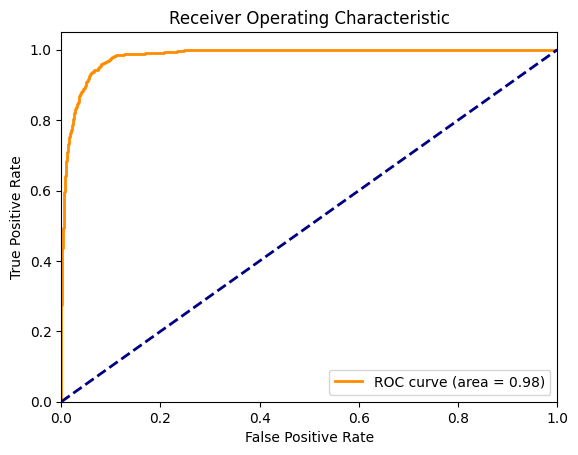

In [131]:
plt.figure()
plt.plot(fpr,tpr,lw=2,color = 'darkorange',label = 'ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show() 


Model Evaluation : Rank Holder and KS Statistic

In [132]:
best_model

LogisticRegression(C=1.64362335424635, class_weight='balanced',
                   solver='newton-cg', tol=1.5152631496958282e-06)

In [133]:
probab = best_model.predict_proba(X_test_encoded)[:,1]

In [134]:
probab

array([5.37031295e-01, 1.55487206e-05, 6.38696020e-03, ...,
       3.05890929e-03, 8.12917035e-01, 5.85821588e-01], shape=(12497,))

In [141]:
df_eval = pd.DataFrame({ 
    'Default Truth' : y_test3,
    'Default probabilities' : probab})
df_eval.sample(20)


,Default Truth,Default probabilities
12301,0,0.517
25248,0,0.080
3591,0,0.053
16278,0,0.000
1118,0,0.104
31382,0,0.001
7923,0,0.000
34511,0,0.000
38199,0,0.000
1999,0,0.823


In [142]:
import pandas as pd

# Assuming you already have predicted probabilities
df_eval['decile'] = pd.qcut(df_eval['Default probabilities'], q=10, labels=False,duplicates = 'drop')
df_eval

,Default Truth,Default probabilities,decile
19205,0,0.537,8
15514,0,0.000,2
30367,0,0.006,6
35347,0,0.007,6
41814,1,0.924,9
...,...,...,...
29297,0,0.001,4
20567,0,0.000,3
681,0,0.003,5
33682,0,0.813,8


In [153]:
df_decile = df_eval.groupby('decile').apply(lambda x : pd.Series({
    'Maximum Probabilty' : x['Default probabilities'].max(),
    'Minimum Probability' : x['Default probabilities'].min(),
    'events' : x['Default Truth'].sum(),
    'Non events' : x['Default Truth'].count() - x['Default Truth'].sum() 
}))
df_decile.reset_index(inplace=True)
df_decile

C:\Users\Vikram Yadav\AppData\Local\Temp\ipykernel_14496\522638975.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('decile').apply(lambda x : pd.Series({


,decile,Maximum Probabilty,Minimum Probability,events,Non events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1249.000
3,3,0.000,0.000,0.000,1250.000
4,4,0.001,0.000,0.000,1250.000
5,5,0.005,0.001,0.000,1249.000
6,6,0.031,0.005,5.000,1245.000
7,7,0.216,0.031,10.000,1239.000
8,8,0.813,0.217,161.000,1089.000
9,9,1.000,0.814,898.000,352.000


In [154]:
df_decile['Events Rate'] = df_decile['events']*100/(df_decile['events']+df_decile['Non events']) 
df_decile['Non Events Rate'] = df_decile['Non events']*100/(df_decile['events']+df_decile['Non events']) 
df_decile

,decile,Maximum Probabilty,Minimum Probability,events,Non events,Events Rate,Non Events Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1249.000,0.000,100.000
3,3,0.000,0.000,0.000,1250.000,0.000,100.000
4,4,0.001,0.000,0.000,1250.000,0.000,100.000
5,5,0.005,0.001,0.000,1249.000,0.000,100.000
6,6,0.031,0.005,5.000,1245.000,0.400,99.600
7,7,0.216,0.031,10.000,1239.000,0.801,99.199
8,8,0.813,0.217,161.000,1089.000,12.880,87.120
9,9,1.000,0.814,898.000,352.000,71.840,28.160


In [155]:
df_decile = df_decile.sort_values(by='decile',ascending = False).reset_index(drop=True)
df_decile

,decile,Maximum Probabilty,Minimum Probability,events,Non events,Events Rate,Non Events Rate
0,9,1.000,0.814,898.000,352.000,71.840,28.160
1,8,0.813,0.217,161.000,1089.000,12.880,87.120
2,7,0.216,0.031,10.000,1239.000,0.801,99.199
3,6,0.031,0.005,5.000,1245.000,0.400,99.600
4,5,0.005,0.001,0.000,1249.000,0.000,100.000
5,4,0.001,0.000,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [156]:
df_decile['cum events'] = df_decile['events'].cumsum()
df_decile['cum non events'] = df_decile['Non events'].cumsum()
df_decile

,decile,Maximum Probabilty,Minimum Probability,events,Non events,Events Rate,Non Events Rate,cum events,cum non events
0,9,1.000,0.814,898.000,352.000,71.840,28.160,898.000,352.000
1,8,0.813,0.217,161.000,1089.000,12.880,87.120,1059.000,1441.000
2,7,0.216,0.031,10.000,1239.000,0.801,99.199,1069.000,2680.000
3,6,0.031,0.005,5.000,1245.000,0.400,99.600,1074.000,3925.000
4,5,0.005,0.001,0.000,1249.000,0.000,100.000,1074.000,5174.000
5,4,0.001,0.000,0.000,1250.000,0.000,100.000,1074.000,6424.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000


In [158]:
df_decile['Cum Event Rate'] = df_decile['cum events']*100/df_decile['events'].sum()
df_decile['Cum Non Event Rate'] = df_decile['cum non events']*100/df_decile['Non events'].sum()
df_decile

,decile,Maximum Probabilty,Minimum Probability,events,Non events,Events Rate,Non Events Rate,cum events,cum non events,Cum Event Rate,Cum Non Event Rate
0,9,1.000,0.814,898.000,352.000,71.840,28.160,898.000,352.000,83.613,3.082
1,8,0.813,0.217,161.000,1089.000,12.880,87.120,1059.000,1441.000,98.603,12.615
2,7,0.216,0.031,10.000,1239.000,0.801,99.199,1069.000,2680.000,99.534,23.461
3,6,0.031,0.005,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361
4,5,0.005,0.001,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295
5,4,0.001,0.000,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000


In [160]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non Event Rate'])
df_decile

,decile,Maximum Probabilty,Minimum Probability,events,Non events,Events Rate,Non Events Rate,cum events,cum non events,Cum Event Rate,Cum Non Event Rate,KS
0,9,1.000,0.814,898.000,352.000,71.840,28.160,898.000,352.000,83.613,3.082,80.531
1,8,0.813,0.217,161.000,1089.000,12.880,87.120,1059.000,1441.000,98.603,12.615,85.988
2,7,0.216,0.031,10.000,1239.000,0.801,99.199,1069.000,2680.000,99.534,23.461,76.073
3,6,0.031,0.005,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361,65.639
4,5,0.005,0.001,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295,54.705
5,4,0.001,0.000,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237,43.763
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180,32.820
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114,21.886
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057,10.943
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000,0.000


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [ ]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

#### Finalize The Model and Visualize Feature Importance

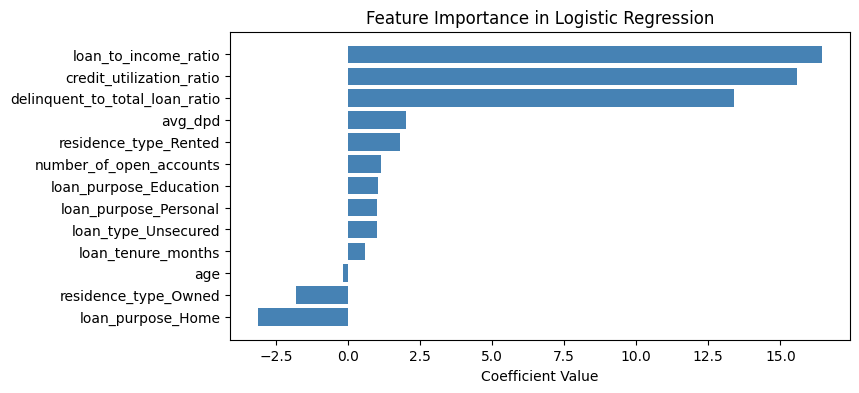

In [162]:
final_model = best_model

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show() 

### Save the Model

In [163]:
X_test_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income_ratio,delinquent_to_total_loan_ratio,avg_dpd,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.549,0.000,0.000,True,False,False,True,False,False
15514,0.481,0.226,1.000,0.323,0.219,0.000,0.000,True,False,True,False,False,False


In [164]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income_ratio',
       'delinquent_to_total_loan_ratio', 'avg_dpd', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [165]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income_ratio',
       'delinquent_to_total_loan_ratio', 'avg_dpd'],
      dtype='object')

In [166]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income_ratio',
       'delinquent_to_total_loan_ratio', 'avg_dpd', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [167]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'artifacts/model_data.joblib') 

['artifacts/model_data.joblib']

In [168]:
final_model.coef_, final_model.intercept_

(array([[-0.17011811,  0.60080914,  1.14385635, 15.57113392, 16.43835661,
         13.3781133 ,  2.03095438, -1.80717381,  1.8159179 ,  1.03870358,
         -3.1139974 ,  1.00440492,  1.00440492]]),
 array([-20.13986976]))